In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.formula.api as sm
import warnings
#warnings.simplefilter("always")
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.metrics as metrics
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from itertools import islice
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from collections import Counter
import seaborn as sns
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.models import Sequential
from keras.regularizers import l1_l2, l1 ,l2
from keras import optimizers
from keras.callbacks import EarlyStopping
import statsmodels.api as sm
from statsmodels.formula.api import ols

Data Cleaning and Preprocessing

In [4]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [5]:
df.head() # display first 5 rows

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail() # display last 5 rows

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dtypes # check data types

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [8]:
df.isnull().sum() # sum of null values for each column

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
df1 = df.dropna(subset=['Name','Year_of_Release','Genre','Publisher']) # remove observations with vacant 'Genre', 'Publisher' and/or 'Year_of_Release' 
df1.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         6579
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [10]:
df1['Year_of_Release'] = df1['Year_of_Release'].astype('int') # change Year_of_Release from float64 to type int
df1['Year_of_Release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16714    2016
16715    2006
16716    2016
16717    2003
16718    2016
Name: Year_of_Release, Length: 16416, dtype: int64

In [11]:
# (2) replace 'tbd' in 'User_Score' with NaN and transform 'User_Score' to float data

# first, replace 'tbd' in User_Score with 'NaN'
df1["User_Score"] = df1["User_Score"].replace('tbd', np.nan)
# then transform User_Score to float
df1["User_Score"] = df1["User_Score"].astype('float')
df1.dtypes

Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [12]:
for x in ["Critic_Score", "Critic_Count", "User_Score", "User_Count"]: # separate genres to fill NaN of critic score with the critic score means of each genre
    df1.loc[df1[x].isnull(), x] = df1.groupby("Genre")[x].transform("mean")

In [13]:
df1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.124490,23.767347,7.305896,109.674528,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,72.655267,32.514364,7.624423,321.928087,NaN,NaN


In [18]:
def plot_category_scores(df,category,y='Critic_Score',start_year=2000):
    # group by Year and Category
    grouped = df.groupby(['Year_of_Release',category])[y].mean()
    column_name = '%s_%s'%(category,y)
    g = pd.DataFrame(grouped.reset_index(name=column_name))
    
    # define the start year of the data for plotting
    years = g['Year_of_Release']>= start_year
    g_after_start_year = g[years]
    
    # plot the data
    ax = sns.catplot(x='Year_of_Release', y=column_name, hue=category, palette='deep', kind='point', data=g_after_start_year, height=5, aspect=3)
    ax.fig.suptitle('%s of Each %s'%(y,category))
    
    return

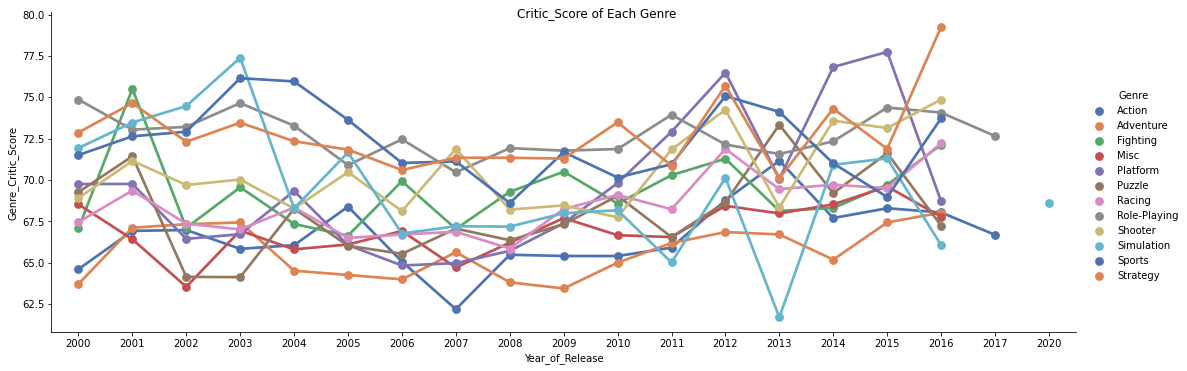

In [19]:
plot_category_scores(df1,'Genre',y='Critic_Score',start_year=2000, )

In [ ]:
plot_category_scores(df1,'Genre',y='Critic_Count',start_year=2000)

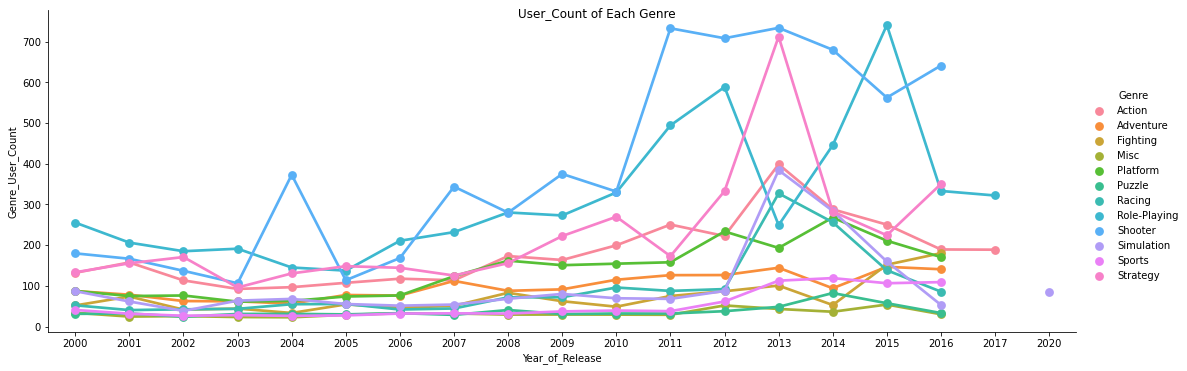

In [262]:
plot_category_scores(df1,'Genre',y='User_Count',start_year=2000)

In [263]:
def plot_category_sales(df,category,region='Global',start_year=2000):
    # group by Year and Category
    grouped = df.groupby(['Year_of_Release',category])['%s_Sales'%region].sum()
    column_name = '%s_%s_Sales'%(category,region)
    g = pd.DataFrame(grouped.reset_index(name=column_name))
    
    # define the start year of the data for plotting
    years = g['Year_of_Release']>= start_year
    g_after_start_year = g[years]
    
    # plot the data
    ax = sns.catplot(x='Year_of_Release', y=column_name, hue=category, kind='point', data=g_after_start_year, height=5, aspect=3)
    ax.fig.suptitle('%s Sales of Each %s'%(region,category))
    
    return

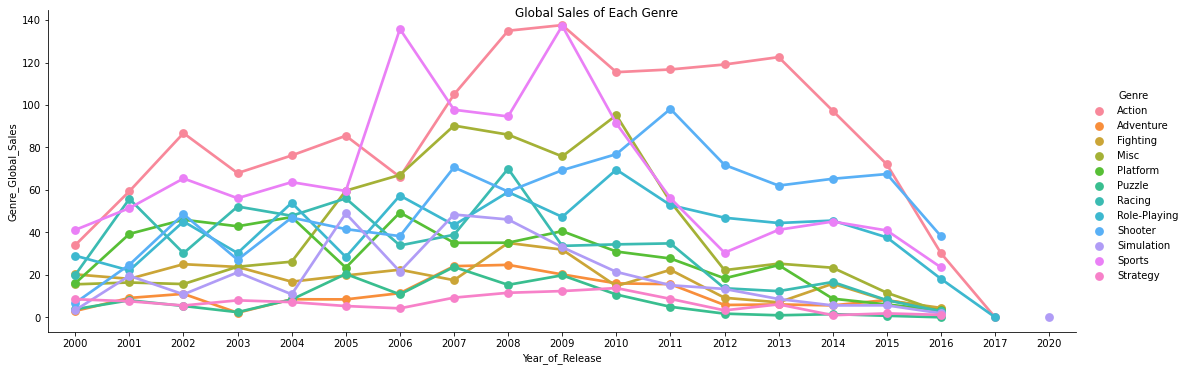

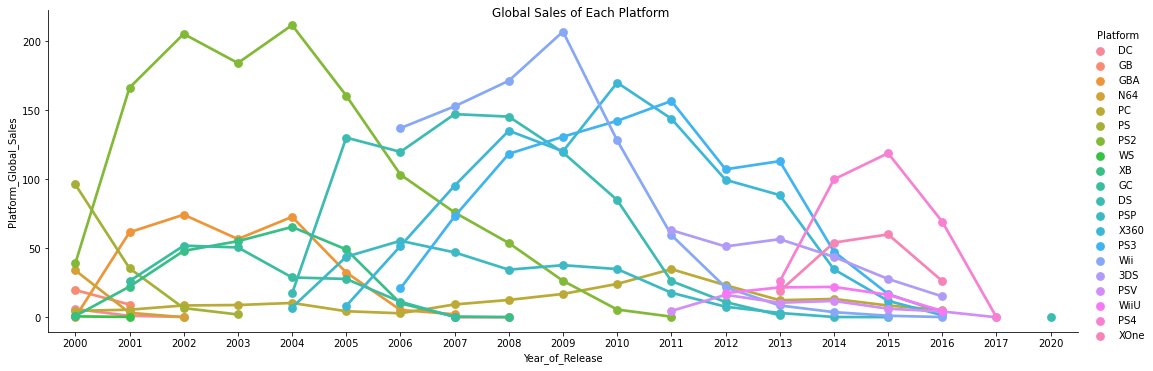

In [264]:
# plot category yearly sales
plot_category_sales(df1,'Genre',start_year=2000)
plot_category_sales(df1,'Platform',region='Global',start_year=2000)

In [265]:
def hist_top_n(df, column, n=10, year=0):
    """
    histogram of the top n feature which is defined by argument column,
    feature/column can be platforms, genres and etc. 
    
    when year=0, show the histogram of feature in all the years,
    when year is specific, show the histogram of the feature in that specific year.
    """
    years = df['Year_of_Release'].unique()    # years in the data
    if year == 0:
        # count all the years
        x = dict(Counter(df[column]))
    elif year in years:
        # count the specific year
        x = dict(Counter(df[column].loc[df['Year_of_Release']==year],))
    else:
        raise ValueError('The dataset does not contain data of that year.' )
        
    # sort the dictionary of x by value
    x = {k:v for k, v in sorted(x.items(), key=lambda item:item[1], reverse=True)} 

    # get the top 10 x
    top_x = {k: x[k] for k in list(x)[:n]}

    # plot histogram for the top 10 platforms
    fig = plt.figure(figsize=(15,6))
    plt.bar(top_x.keys(), top_x.values(), width=0.65, color='g')
    plt.grid(axis='y', alpha=0.2)
    plt.xlabel(column)
    plt.ylabel('Counts of Video Game')
    
    earliest_year = int(df['Year_of_Release'].min())
    latest_year = int(df['Year_of_Release'].max())
    if year==0:
        plt.title('Top %s %ss in Years %s-%s'%(n,column,earliest_year,latest_year))
    else:
        plt.title('Top %s %ss in Year %s '%(n,column,year))
    plt.show()
    
    return

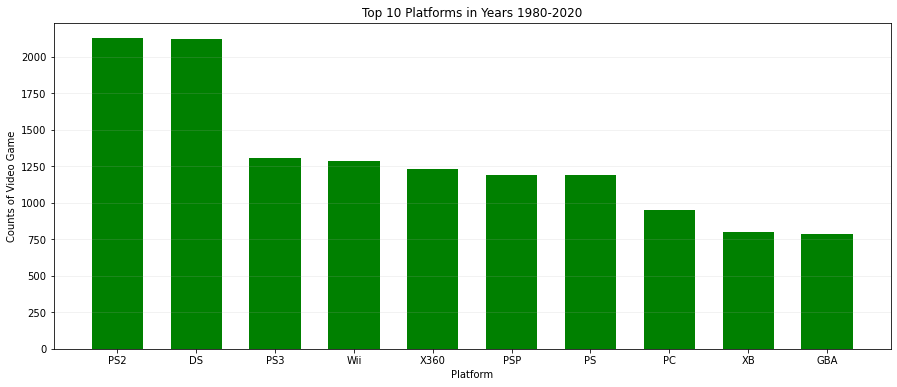

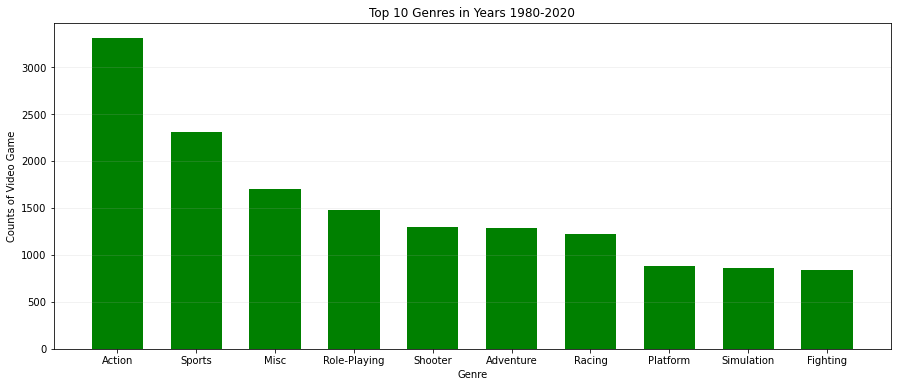

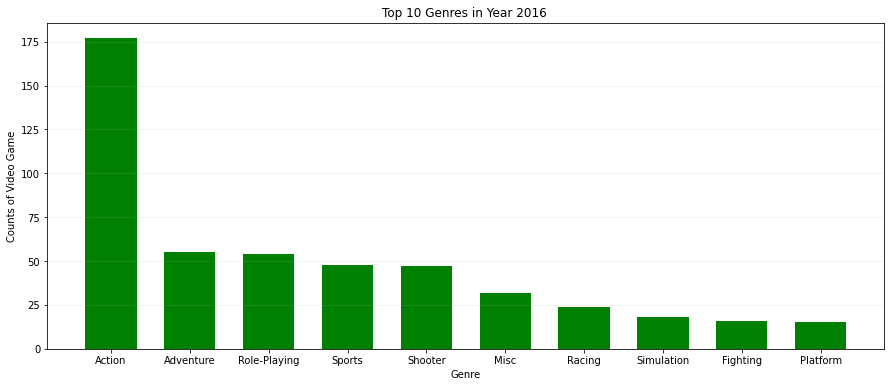

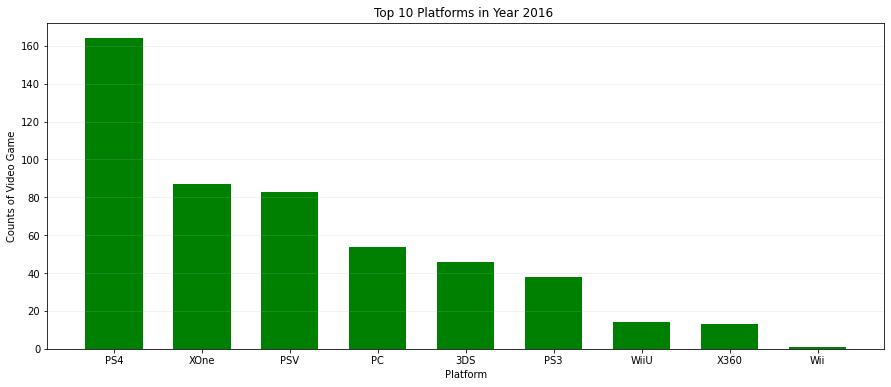

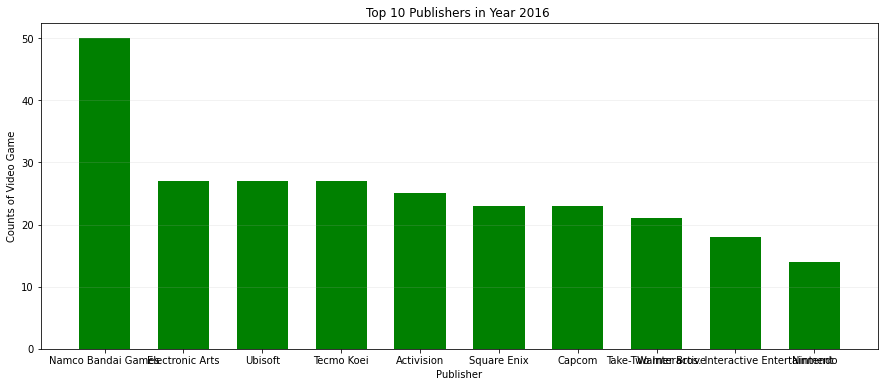

In [266]:
# histogram of the top 10 Platforms in all the years
hist_top_n(df1, 'Platform', year=0)
# histogram of the top 10 Genres in all the years
hist_top_n(df1, 'Genre', n=10, year=0)
    
# histogram of the top 5 Genres, Platforms and Publishers of video game in year 2016
hist_top_n(df1, 'Genre', n=10, year=2016)
hist_top_n(df1,'Platform',n=10,year=2016)
hist_top_n(df1,'Publisher',n=10, year=2016)

In [267]:
def region_sales(df, region='Global'):
    """
    return yearly sales in defined region.
    """
    if region=="Global":
        sales_per_year = df['Global_Sales'].groupby(df['Year_of_Release']).sum()
    elif region =="NA":
        sales_per_year = df['NA_Sales'].groupby(df['Year_of_Release']).sum()
    elif region =="EU":
        sales_per_year = df['EU_Sales'].groupby(df['Year_of_Release']).sum()
    elif region == "JP":
        sales_per_year = df['JP_Sales'].groupby(df['Year_of_Release']).sum()
    elif region == "Other":
        sales_per_year = df['Other_Sales'].groupby(df['Year_of_Release']).sum()
    
    return sales_per_year

In [268]:
# plot the yearly sales in regions
def plot_region_sales(df,regions = ['Global','NA','EU','JP','Other']):
    """
    plot yearly sales of defined regions.
    """
    fig = plt.figure(figsize=(15,7))
    fig.suptitle('Yearly Sales', fontsize=20)

    regions = ['Global','NA','EU','JP','Other']
    colors = ['r','c','g','b','m']
    for i in range(len(regions)):
        ax = fig.add_subplot(231+i)
        ax.set_title(regions[i])
        ax.plot(region_sales(df,region=regions[i]), color=colors[i])
    plt.show()
    return

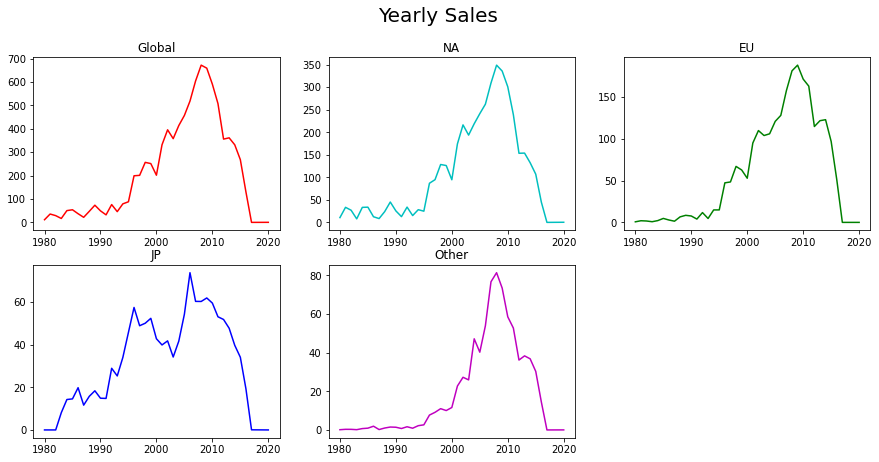

In [269]:
# plot yearly sales for each region
plot_region_sales(df1)

In [270]:
def pie_chart_region_sales(df, year=0, regions=['NA','EU','JP','Other']):
    
    """
    draw the pie char of sales for defined regions.
    """
    
    # get the total sales of each regions
    years = df['Year_of_Release'].unique()
    region_sales=[]
    for region in regions:
        if year == 0:
            # total sales of each region in all the years
            sales = df['%s_Sales'%region].sum()
        elif year in df['Year_of_Release'].unique():
            # total sales of each region in a specific year
            sales = df['%s_Sales'%region].loc[df['Year_of_Release']==year].sum()
        else:
            raise ValueError('The dataset does not contain data of that year.')
            
        region_sales.append(sales)
        
     # plot the pie chart
    colors = ['darkorange','sandybrown','darksalmon','orangered','chocolate']
    plt.pie(region_sales, labels=regions, colors=colors[0:len(regions)], autopct='%.2f')
    plt.axis('equal')
    
    if year == 0:
        plt.title('Regional Sales in Years 1980-2020')
    else:
        plt.title('Regional Sales in Year %s'%year)
    plt.show()
    
    return

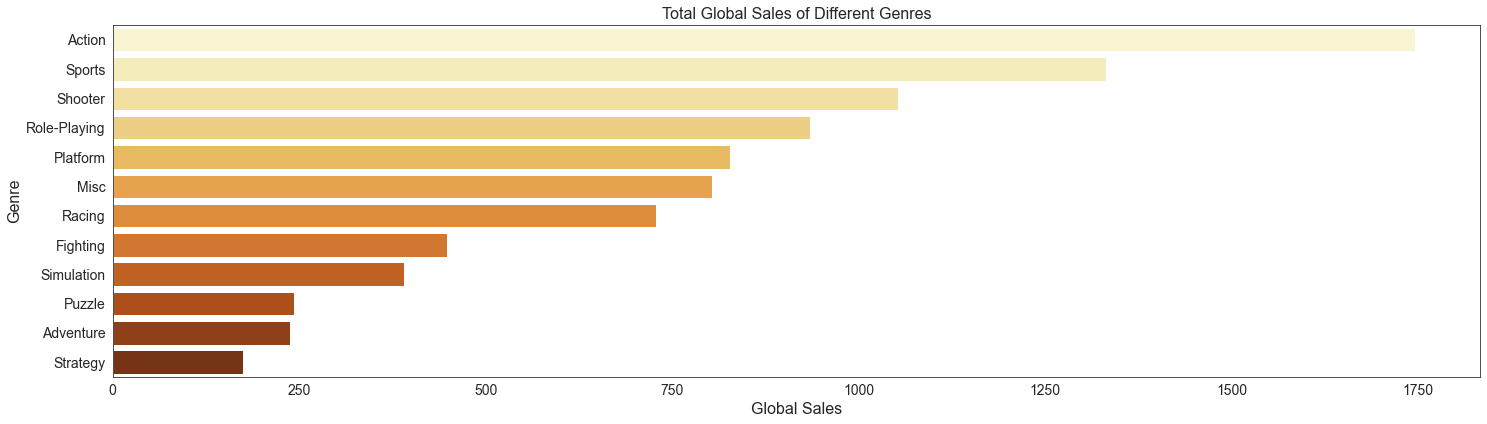

In [22]:
fig=plt.figure(figsize=(24.5,22))
plt.subplot2grid((3,1), (1,0))
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Total Global Sales of Different Genres',fontdict={'fontsize':16})
sns.barplot(y='Genre', x='Global_Sales', data=df.groupby('Genre').sum().Global_Sales.sort_values(ascending=False).reset_index(),palette='YlOrBr');
plt.ylabel('Genre',fontdict={'fontsize':16})
plt.xlabel('Global Sales',fontdict={'fontsize':16});

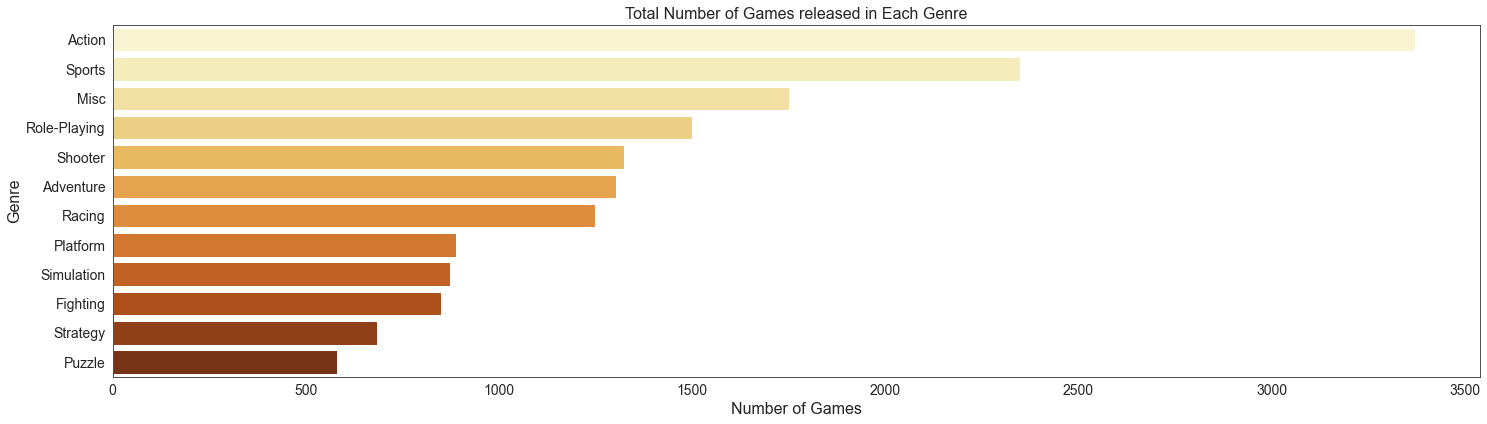

In [24]:
fig=plt.figure(figsize=(24.5,22))
sns.set_style("white")
plt.subplot2grid((3,1), (1,0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Total Number of Games released in Each Genre',fontdict={'fontsize':16})
sns.barplot(y=df['Genre'].value_counts().index,x=df['Genre'].value_counts(),palette='YlOrBr')
plt.ylabel('Genre',fontdict={'fontsize':16})
plt.xlabel('Number of Games',fontdict={'fontsize':16});

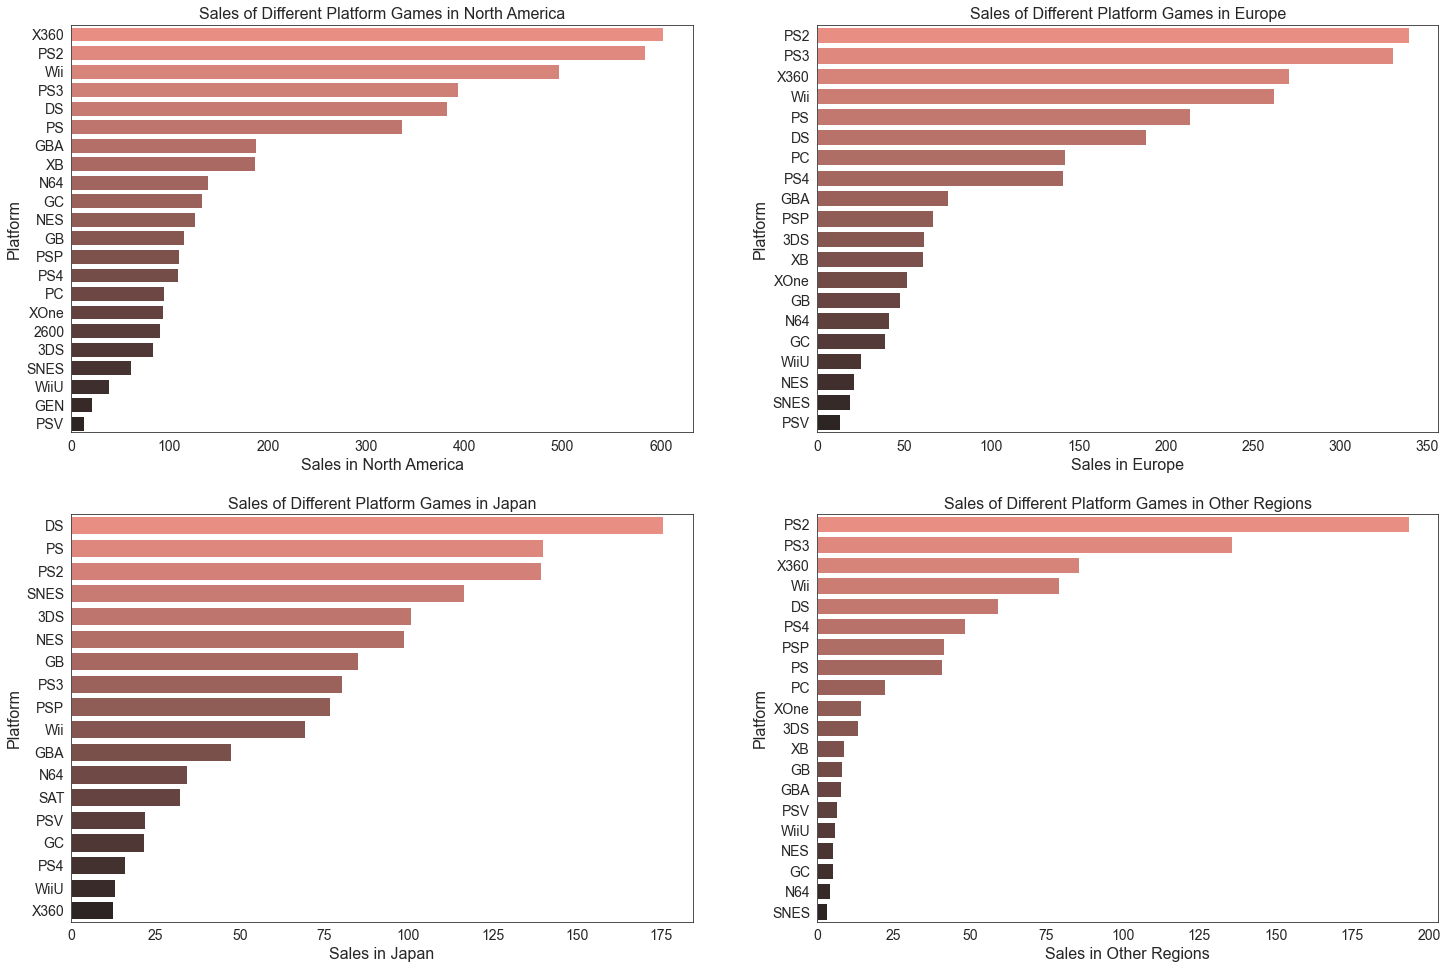

In [26]:
fig=plt.figure(figsize=(24.5,16.5))
sns.set_style("white")

plt.subplot(2, 2, 1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Sales of Different Platform Games in North America',fontdict={'fontsize':16})
Plat_salesNA=df.groupby(df['Platform']).sum().NA_Sales.sort_values(ascending=False).reset_index()
sns.barplot(y='Platform',x='NA_Sales',data=Plat_salesNA[Plat_salesNA['NA_Sales']>10],palette='dark:salmon_r')
plt.ylabel('Platform',fontdict={'fontsize':16})
plt.xlabel('Sales in North America',fontdict={'fontsize':16});

plt.subplot(2, 2, 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Sales of Different Platform Games in Europe',fontdict={'fontsize':16})
Plat_salesEU=df.groupby(df['Platform']).sum().EU_Sales.sort_values(ascending=False).reset_index()
sns.barplot(y='Platform',x='EU_Sales',data=Plat_salesEU[Plat_salesEU['EU_Sales']>=10],palette='dark:salmon_r')
plt.ylabel('Platform',fontdict={'fontsize':16})
plt.xlabel('Sales in Europe',fontdict={'fontsize':16});

plt.subplot(2, 2, 3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Sales of Different Platform Games in Japan',fontdict={'fontsize':16})
Plat_salesJP=df.groupby(df['Platform']).sum().JP_Sales.sort_values(ascending=False).reset_index()
sns.barplot(y='Platform',x='JP_Sales',data=Plat_salesJP[Plat_salesJP['JP_Sales']>=10],palette='dark:salmon_r')
plt.ylabel('Platform',fontdict={'fontsize':16})
plt.xlabel('Sales in Japan',fontdict={'fontsize':16});

plt.subplot(2, 2, 4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Sales of Different Platform Games in Other Regions',fontdict={'fontsize':16})
Plat_salesOT=df.groupby(df['Platform']).sum().Other_Sales.sort_values(ascending=False).reset_index()
sns.barplot(y='Platform',x='Other_Sales',data=Plat_salesOT[Plat_salesOT['Other_Sales']>=1],palette='dark:salmon_r')
plt.ylabel('Platform',fontdict={'fontsize':16})
plt.xlabel('Sales in Other Regions',fontdict={'fontsize':16});

In [27]:
df20=df[df['Year_of_Release']<=2000]
df21=df[df['Year_of_Release']>2000]

In [29]:
index = ['North America', 'Europe', 'Japan', 'Other Regions', 'Global']
  
# Convert the dictionary into DataFrame  
# Make Own Index and Removing Default index 
salcent=pd.DataFrame({'20th Century':[df20['NA_Sales'].sum(),df20['EU_Sales'].sum(),df20['JP_Sales'].sum(),df20['Other_Sales'].sum(),df20['Global_Sales'].sum()],'21st Century':[df21['NA_Sales'].sum(),df21['EU_Sales'].sum(),df21['JP_Sales'].sum(),df21['Other_Sales'].sum(),df21['Global_Sales'].sum()]},index=index)

salcent

,20th Century,21st Century
North America,908.09,3435.38
Europe,367.37,2032.84
Japan,517.62,773.11
Other Regions,66.22,716.51
Global,1859.47,6961.87


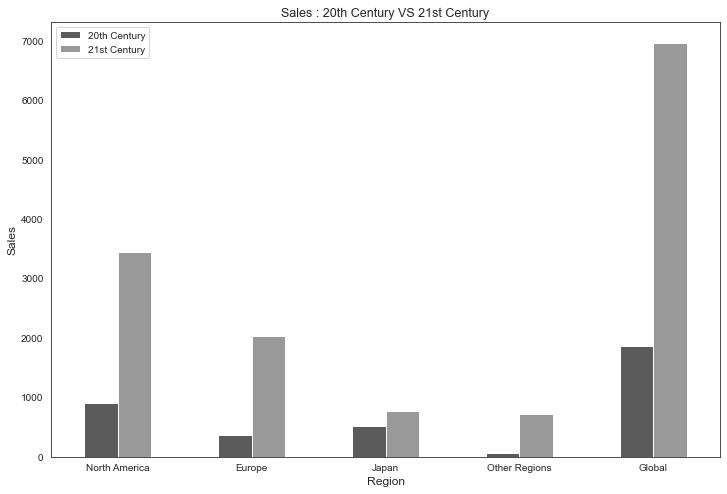

In [31]:
sns.set_style("white")

salcent.plot(kind='bar',figsize=(12,8),color=['#5b5b5b','#999999'])
plt.xticks(rotation=0)
plt.title('Sales : 20th Century VS 21st Century',fontdict={'fontsize':12.5})
plt.xlabel('Region',fontdict={'fontsize':12})
plt.ylabel('Sales',fontdict={'fontsize':12});
plt.show()

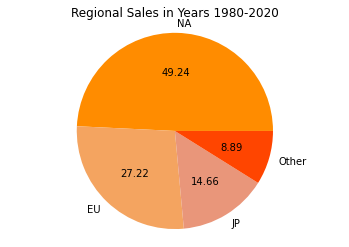

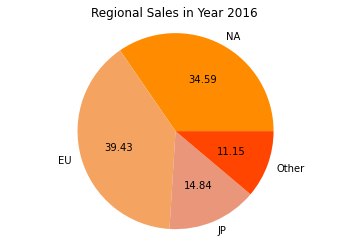

In [271]:
# draw pie chart of each regional sales
pie_chart_region_sales(df1, year=0, regions=['NA','EU','JP','Other']) 
pie_chart_region_sales(df1, year=2016, regions=['NA','EU','JP','Other']) 

In [272]:
#(1) one hot encoding for category data
# data preprocessing, change string to vectors by one hot encoding

def one_hot_encoding(df,feature,v):
    categories = df[feature].unique()
    categories = np.delete(categories,[0])   # remove one value in the categories in case of multilinearity
    v_encoded = [0 if category != v else 1 for category in categories]
    v_encoded = np.array(v_encoded).flatten()
    return v_encoded

def X_encode(df,feature):
    """perform one hot encoding for whole column"""
    X_encode = [one_hot_encoding(df,feature,v) for v in df[feature].tolist()]
    X_encode = np.array(X_encode)
    return X_encode

In [290]:
years = df1['Year_of_Release'] >= 2008
data_from_2008 = df1[years]
data_from_2008['Global_Sales'].describe()

count    8127.000000
mean        0.476899
std         1.306676
min         0.010000
25%         0.050000
50%         0.140000
75%         0.410000
max        35.520000
Name: Global_Sales, dtype: float64

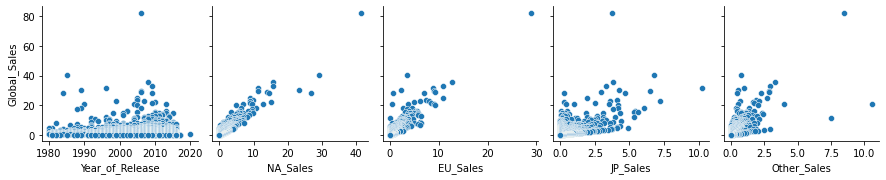

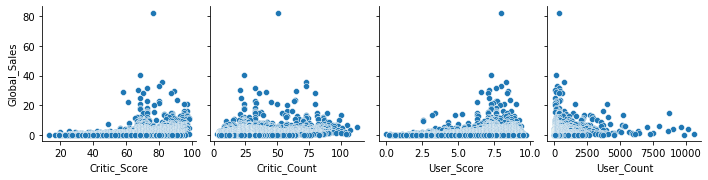

In [274]:
# pairplots against outcome variable Global_Sales
sns.pairplot(data=df1,
                  y_vars=['Global_Sales'],
                  x_vars=['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
sns.pairplot(data=df1,
                  y_vars=['Global_Sales'],
                  x_vars=['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'])

In [275]:
# correlation matrix for non-categorial variables
data_from_2008.corr()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.039681,0.028488,0.028354,-0.011225,-0.005627,0.107654,0.077169,-0.059759,0.120356
NA_Sales,-0.039681,1.000000,0.806010,0.368517,0.794069,0.942960,0.255390,0.350430,0.029301,0.316091
EU_Sales,0.028488,0.806010,1.000000,0.379986,0.892029,0.930783,0.268151,0.344833,0.017320,0.372665
JP_Sales,0.028354,0.368517,0.379986,1.000000,0.314505,0.533238,0.113072,0.167001,0.115805,0.072251
Other_Sales,-0.011225,0.794069,0.892029,0.314505,1.000000,0.887080,0.273834,0.328128,0.028776,0.359206
Global_Sales,-0.005627,0.942960,0.930783,0.533238,0.887080,1.000000,0.275028,0.365487,0.044635,0.345516
Critic_Score,0.107654,0.255390,0.268151,0.113072,0.273834,0.275028,1.000000,0.446594,0.451528,0.325246
Critic_Count,0.077169,0.350430,0.344833,0.167001,0.328128,0.365487,0.446594,1.000000,0.200867,0.411290
User_Score,-0.059759,0.029301,0.017320,0.115805,0.028776,0.044635,0.451528,0.200867,1.000000,0.052025
User_Count,0.120356,0.316091,0.372665,0.072251,0.359206,0.345516,0.325246,0.411290,0.052025,1.000000


In [311]:
# correlation matrix for non-categorial variables
corr = data_from_2008.corr()
# 'coolwarm', 'RdBu_r', 'BrBG_r', & PuOr_r good diverging colormaps
corr.style.background_gradient(cmap='binary')

/Users/ash/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,1.000000,-0.039681,0.028488,0.028354,-0.011225,-0.005627,0.107654,0.077169,-0.059759,0.120356
NA_Sales,-0.039681,1.000000,0.806010,0.368517,0.794069,0.942960,0.255390,0.350430,0.029301,0.316091
EU_Sales,0.028488,0.806010,1.000000,0.379986,0.892029,0.930783,0.268151,0.344833,0.017320,0.372665
JP_Sales,0.028354,0.368517,0.379986,1.000000,0.314505,0.533238,0.113072,0.167001,0.115805,0.072251
Other_Sales,-0.011225,0.794069,0.892029,0.314505,1.000000,0.887080,0.273834,0.328128,0.028776,0.359206
Global_Sales,-0.005627,0.942960,0.930783,0.533238,0.887080,1.000000,0.275028,0.365487,0.044635,0.345516
Critic_Score,0.107654,0.255390,0.268151,0.113072,0.273834,0.275028,1.000000,0.446594,0.451528,0.325246
Critic_Count,0.077169,0.350430,0.344833,0.167001,0.328128,0.365487,0.446594,1.000000,0.200867,0.411290
User_Score,-0.059759,0.029301,0.017320,0.115805,0.028776,0.044635,0.451528,0.200867,1.000000,0.052025
User_Count,0.120356,0.316091,0.372665,0.072251,0.359206,0.345516,0.325246,0.411290,0.052025,1.000000


In [277]:
# (2) preprocess to define X for machine learning
def preprocessX(df):
    """
    one hot encoding for platform, genre, publisher;
    concatenate year and the encoded platform, genre, publisher together as X. 
    """
    platf_encoded = X_encode(df,'Platform')
    genre_encoded = X_encode(df,'Genre')
    publisher_encoded = X_encode(df,'Publisher')
    year = np.array(df['Year_of_Release']).reshape(-1,1)
    critic_score = np.array(df['Critic_Score']).reshape(-1,1)
    user_score = np.array(df['User_Score']).reshape(-1,1)
    critic_count = np.array(df['Critic_Count']).reshape(-1,1)
    user_count = np.array(df['User_Count']).reshape(-1,1)
    
    X = np.concatenate((year,platf_encoded, genre_encoded, publisher_encoded, critic_score, user_score,
                       critic_count,user_count), axis=1)
    
    return X

In [278]:
# define X,Y or y for model training
X = preprocessX(data_from_2008)
y = data_from_2008['Global_Sales']
y = np.array(y)

In [304]:
# (3) K-fold cross validation to select linear model， evaluated by MSE
def Kfold_linear_model_selection(X,y,k=10,method="Ridge",regul = [0.0001,0.001,0.01,0.1,0,1,10,100,1000]):
    
    """
    Use K-fold cross validation to do linear model selection.
    Return the best model(regularization parameter) and corresponding mean square error of the model.
    """
    
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    kf_mse = np.zeros(shape=(k,len(regul)))
    
    for index, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # standardize features 
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        mse_list = []   # a list to store the mse of each r  
        for r in regul:
            if method=="Ridge":
                model = Ridge(alpha=r,random_state=42).fit(X_train_scaled, y_train)
                
            elif method=="Lasso": 
                #model = Lasso(alpha=r, random_state=42,max_iter=10000).fit(X_train_scaled, y_train)
                model = Lasso(alpha=r, random_state=42, max_iter=1000, tol=0.1).fit(X_train_scaled, y_train)
                
            y_pred = model.predict(X_test_scaled)
            # plt.scatter(y_test, y_pred)
            # plt.hist(y_test - y_pred)
            MSE = mean_squared_error(y_test, y_pred)
            mse_list.append(MSE)
            
        print('%s CV round %s'%(method,index))
       
        kf_mse[index]=mse_list
        
    mean_mse = np.mean(kf_mse, axis=0) # kfold mean mse of each model
    print(mean_mse)
    best = np.argmin(mean_mse)     # the index of minimal mse
    best_r = regul[best]           # the best fit regularization parameter
    
    print('Best regularization parameter for %s: %s'%(method,best_r))
    print('MSE for this model: %s'%mean_mse[best])
    return best_r, mean_mse[best]

/Users/ash/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [305]:
# K fold cross validation to do linear model selection
print("K-fold CV for linear model selection, get the best fit linear model...")
#Kfold_linear_model_selection(X,y,method='Ridge')
Kfold_linear_model_selection(X,y,method='Lasso') # Lasso can not converge

/Users/ash/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


K-fold CV for linear model selection, get the best fit linear model...


<ipython-input-304-4c81c8e01203>:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=r, random_state=42, max_iter=1000, tol=0.1).fit(X_train_scaled, y_train)
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4530.298336283055, tolerance: 1287.6259361607881
  model = cd_fast.enet_coordinate_descent(


Lasso CV round 0


<ipython-input-304-4c81c8e01203>:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=r, random_state=42, max_iter=1000, tol=0.1).fit(X_train_scaled, y_train)
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4614.686220333569, tolerance: 1292.5089750724637
  model = cd_fast.enet_coordinate_descent(


Lasso CV round 1


<ipython-input-304-4c81c8e01203>:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=r, random_state=42, max_iter=1000, tol=0.1).fit(X_train_scaled, y_train)
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4032.5861895373673, tolerance: 1140.623946918239
  model = cd_fast.enet_coordinate_descent(


Lasso CV round 2


<ipython-input-304-4c81c8e01203>:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=r, random_state=42, max_iter=1000, tol=0.1).fit(X_train_scaled, y_train)
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4632.896649650041, tolerance: 1312.1989338255405
  model = cd_fast.enet_coordinate_descent(


Lasso CV round 3


<ipython-input-304-4c81c8e01203>:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=r, random_state=42, max_iter=1000, tol=0.1).fit(X_train_scaled, y_train)
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4627.045680177912, tolerance: 1314.0484467172555
  model = cd_fast.enet_coordinate_descent(


Lasso CV round 4


<ipython-input-304-4c81c8e01203>:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=r, random_state=42, max_iter=1000, tol=0.1).fit(X_train_scaled, y_train)
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4468.642253660371, tolerance: 1279.6117046226418
  model = cd_fast.enet_coordinate_descent(


Lasso CV round 5


<ipython-input-304-4c81c8e01203>:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=r, random_state=42, max_iter=1000, tol=0.1).fit(X_train_scaled, y_train)
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4469.267267728872, tolerance: 1277.6375221657086
  model = cd_fast.enet_coordinate_descent(


Lasso CV round 6


<ipython-input-304-4c81c8e01203>:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=r, random_state=42, max_iter=1000, tol=0.1).fit(X_train_scaled, y_train)
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3661.875054402536, tolerance: 1066.241019289132
  model = cd_fast.enet_coordinate_descent(


Lasso CV round 7


<ipython-input-304-4c81c8e01203>:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=r, random_state=42, max_iter=1000, tol=0.1).fit(X_train_scaled, y_train)
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4263.400047847877, tolerance: 1234.6538452139441
  model = cd_fast.enet_coordinate_descent(


Lasso CV round 8


<ipython-input-304-4c81c8e01203>:28: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model = Lasso(alpha=r, random_state=42, max_iter=1000, tol=0.1).fit(X_train_scaled, y_train)
/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Lasso CV round 9
[1.28181731 1.26732133 1.30711151 1.40235911 1.28467726 1.70836567
 1.70836567 1.70836567 1.70836567]
Best regularization parameter for Lasso: 0.001
MSE for this model: 1.2673213321693546


/Users/ash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4467.564997856543, tolerance: 1281.4048578892684
  model = cd_fast.enet_coordinate_descent(


(0.001, 1.2673213321693546)

In [312]:

# standardize features 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_model = Ridge(alpha=100,random_state=42).fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
print(mean_squared_error(y_test,y_pred))
best_model.summary()


/Users/ash/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.036606585649239


AttributeError: 'Ridge' object has no attribute 'summary'